# Get polygons and images from GBDX

Some of the functions used in this notebook can be found in the nice_functions.py file in the Functions folder

In [6]:
### home made functions
import nice_functions as nf

reload(nf)

import get_OSM_polygons as getOSM

reload(getOSM)

### other libraries

import pandas as pd
import numpy as np

from shapely.ops import transform
from shapely.geometry import mapping, Polygon, box, shape

import matplotlib.pyplot as plt
%matplotlib inline

import fiona

import pickle

from gbdxtools import Interface
from gbdxtools.task import env
from gbdxtools import CatalogImage

gbdx = Interface()



In [7]:
city = 'houston'



In [8]:

with open('Pickle/selection_objects_all_{}.pickle'.format(city), 'rb') as handle:
    selection_all = pickle.load(handle)
    
    
with open('Pickle/geom_list_selection_all{}.pickle'.format(city), 'rb') as handle:
    geom_list_selection_all = pickle.load(handle)
    
    
with open('Pickle/project_utm_{}.pickle'.format(city), 'rb') as handle:
    project_utm = pickle.load(handle)
    
    
with open('Pickle/project_wgs_{}.pickle'.format(city), 'rb') as handle:
    project_wgs = pickle.load(handle)
    
with open('Pickle/UTM_EPSG_code_{}.pickle'.format(city), 'rb') as handle:
    UTM_EPSG_code = pickle.load(handle)

#### set variables


In [9]:

dict_type = {'Forest': 1,'Wood': 1,'Nature Reserve': 1,'Wetland': 1, 'Grass': 2, 'Farmland': 2, 'Water': 3, 'Building': 4}


buffer_size =  -10

label_all = np.array([])
data_all = np.array([])





##### Get image data for all polygons, Reproject WGS polygon to UTM polygon and apply mask, extract data to dataframe for use in machine learning algorithms


-----------------------------------------

Fetching Image... 2 tiles
image for OSM-way-468456614 is good object: 0
2017-09-10T17:11:26.528Z
1030010070B54F00
Forest
Fetching Image... 2 tiles


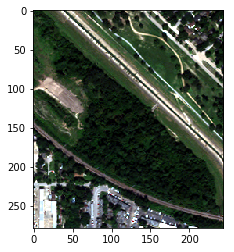

(977098,)
(8, 977098)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-391995076 is good object: 1
2017-09-10T17:12:14.979Z
10300100706B3100
Forest
Fetching Image... 1 tile


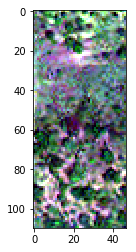

(982268,)
(8, 982268)
-----------------------------------------

is multipolygon object: 2

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-459642779 is good object: 3
2017-09-10T17:11:26.528Z
1030010070B54F00
Forest
Fetching Image... 1 tile


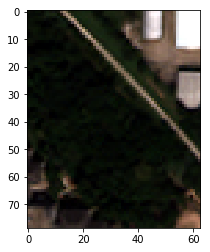

(987245,)
(8, 987245)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-363827600 is good object: 4
2017-09-10T17:12:35.669Z
103001007153DE00
Forest
Fetching Image... 1 tile


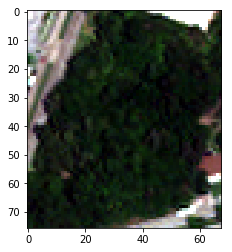

(992413,)
(8, 992413)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-390481273 is good object: 5
2017-09-10T17:12:14.979Z
10300100706B3100
Forest
Fetching Image... 1 tile


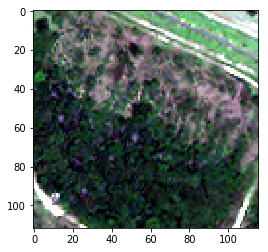

(1005405,)
(8, 1005405)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-465057488 is good object: 6
2017-09-10T17:11:26.528Z
1030010070B54F00
Forest
Fetching Image... 1 tile


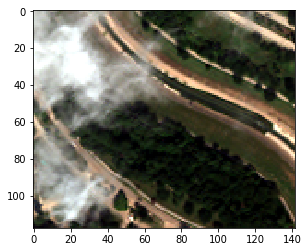

(1022161,)
(8, 1022161)
-----------------------------------------

Fetching Image... 3 tiles
image for OSM-way-387288161 is good object: 7
2017-09-10T17:12:14.979Z
10300100706B3100
Forest
Fetching Image... 3 tiles


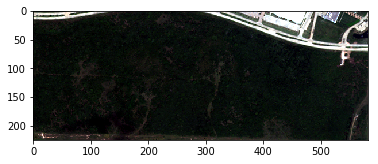

(1153336,)
(8, 1153336)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-387049352 is good object: 8
2017-09-10T17:12:14.979Z
10300100706B3100
Forest
Fetching Image... 1 tile


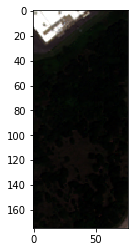

(1166636,)
(8, 1166636)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-422246848 is good object: 9
2017-09-07T17:21:13.367Z
103001006E9B2C00
Forest
Fetching Image... 1 tile


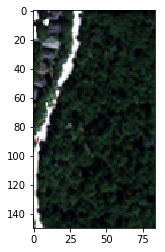

(1179236,)
(8, 1179236)
-----------------------------------------

Fetching Image... 3 tiles
image for OSM-way-319803848 is good object: 10
2017-09-07T17:21:13.367Z
103001006E9B2C00
Forest
Fetching Image... 3 tiles


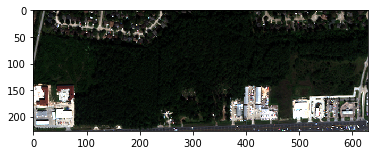

(1322246,)
(8, 1322246)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-288999148 is good object: 11
2017-10-23T17:29:18.194Z
103001007174DA00
Forest
Fetching Image... 1 tile


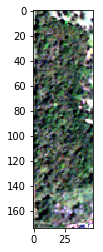

(1330598,)
(8, 1330598)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-404593209 is good object: 12
2017-09-07T17:21:13.367Z
103001006E9B2C00
Forest
Fetching Image... 1 tile


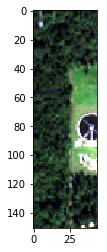

(1337242,)
(8, 1337242)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-465498395 is good object: 13
2017-09-10T17:11:26.528Z
1030010070B54F00
Forest
Fetching Image... 1 tile


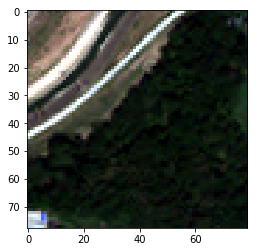

(1343404,)
(8, 1343404)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-378856400 is good object: 14
2017-09-10T17:12:35.669Z
103001007153DE00
Forest
Fetching Image... 1 tile


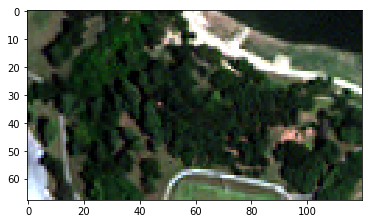

(1351564,)
(8, 1351564)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-47087282 is good object: 15
2017-09-10T17:12:35.669Z
103001007153DE00
Forest
Fetching Image... 1 tile


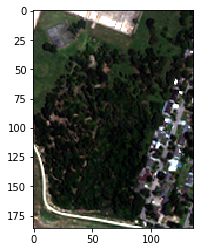

(1377046,)
(8, 1377046)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-390481272 is good object: 16
2017-09-10T17:12:14.979Z
10300100706B3100
Forest
Fetching Image... 1 tile


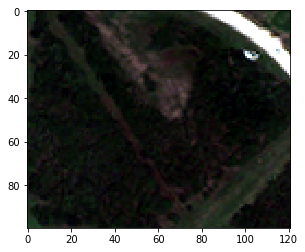

(1389146,)
(8, 1389146)
-----------------------------------------

Fetching Image... 2 tiles
image for OSM-way-390481277 is good object: 17
2017-09-10T17:12:14.979Z
10300100706B3100
Forest
Fetching Image... 2 tiles


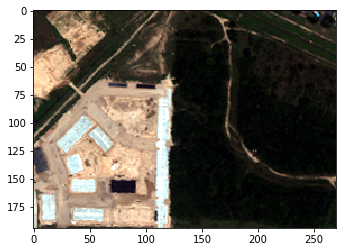

(1441526,)
(8, 1441526)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-437469259 is good object: 18
2017-09-07T17:21:39.008Z
103001007176CB00
Forest
Fetching Image... 1 tile


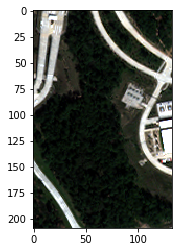

(1469323,)
(8, 1469323)
-----------------------------------------

Fetching Image... 2 tiles
image for OSM-way-451869465 is good object: 19
2016-11-15T17:22:13.161Z
1040010024A09900
Grass
Fetching Image... 2 tiles


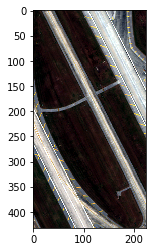

(1566091,)
(8, 1566091)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-375888280 is good object: 20
2017-09-10T17:12:35.669Z
103001007153DE00
Grass
Fetching Image... 1 tile


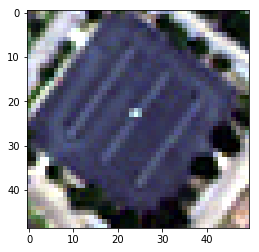

(1568541,)
(8, 1568541)
-----------------------------------------

Fetching Image... 6 tiles
image for OSM-way-476399484 is good object: 21
2017-09-07T17:21:48.364Z
10300100704B5000
Grass
Fetching Image... 6 tiles


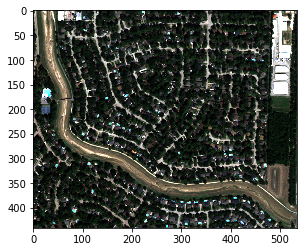

(1804476,)
(8, 1804476)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-378359661 is good object: 22
2017-09-10T17:12:35.669Z
103001007153DE00
Grass
Fetching Image... 1 tile


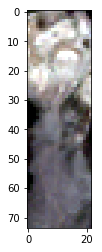

(1806104,)
(8, 1806104)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-375101951 is good object: 23
2017-09-10T17:12:35.669Z
103001007153DE00
Grass
Fetching Image... 1 tile


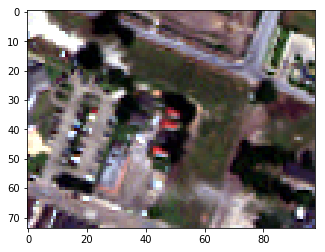

(1813356,)
(8, 1813356)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-364021705 is good object: 24
2017-09-10T17:12:35.669Z
103001007153DE00
Grass
Fetching Image... 1 tile


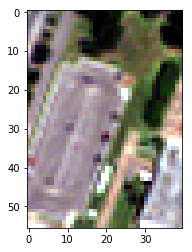

(1815596,)
(8, 1815596)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-451688698 is good object: 25
2017-09-07T17:21:13.367Z
103001006E9B2C00
Grass
Fetching Image... 1 tile


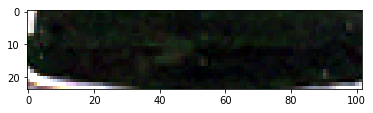

(1818044,)
(8, 1818044)
-----------------------------------------

Fetching Image... 0 tile
no image
-----------------------------------------

Fetching Image... 2 tiles
image for OSM-way-451694993 is good object: 27
2016-11-15T17:22:13.161Z
1040010024A09900
Grass
Fetching Image... 2 tiles


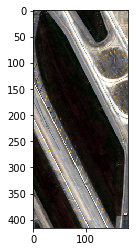

(1893340,)
(8, 1893340)
-----------------------------------------

Fetching Image... 2 tiles
image for OSM-way-390477281 is good object: 28
2017-09-10T17:12:14.979Z
10300100706B3100
Grass
Fetching Image... 2 tiles


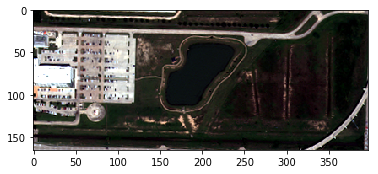

(1959242,)
(8, 1959242)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-387885924 is good object: 29
2017-09-10T17:12:14.979Z
10300100706B3100
Grass
Fetching Image... 1 tile


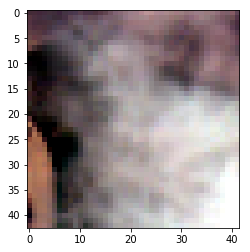

(1961048,)
(8, 1961048)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-452032961 is good object: 30
2016-11-15T17:22:13.161Z
1040010024A09900
Grass
Fetching Image... 1 tile


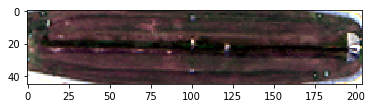

(1970228,)
(8, 1970228)
-----------------------------------------

Fetching Image... 3 tiles
image for OSM-way-451036032 is good object: 31
2017-09-07T17:21:13.367Z
103001006E9B2C00
Grass
Fetching Image... 3 tiles


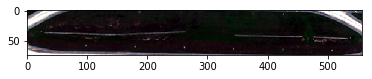

(2011446,)
(8, 2011446)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-452024378 is good object: 32
2017-09-07T17:21:13.367Z
103001006E9B2C00
Grass
Fetching Image... 1 tile


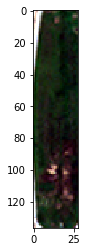

(2015282,)
(8, 2015282)
-----------------------------------------

is multipolygon object: 33

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-318373269 is good object: 34
2017-09-10T17:11:26.528Z
1030010070B54F00
Grass
Fetching Image... 1 tile


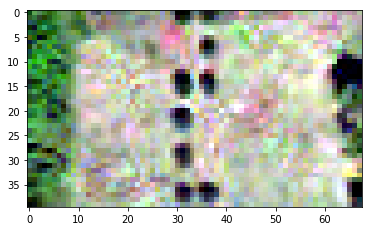

(2018002,)
(8, 2018002)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-389250082 is good object: 35
2017-09-10T17:12:14.979Z
10300100706B3100
Grass
Fetching Image... 1 tile


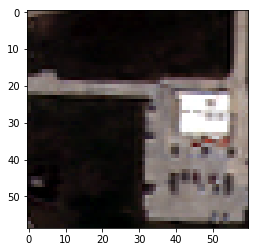

(2021542,)
(8, 2021542)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-45850545 is good object: 36
2017-09-10T17:11:26.528Z
1030010070B54F00
Grass
Fetching Image... 1 tile


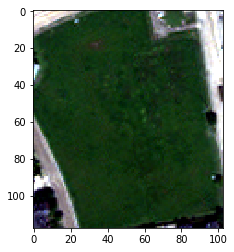

(2033696,)
(8, 2033696)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-318856217 is good object: 37
2017-09-10T17:12:35.669Z
103001007153DE00
Grass
Fetching Image... 1 tile


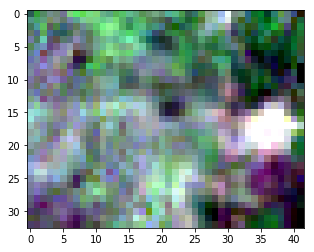

(2035082,)
(8, 2035082)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-277435317 is good object: 38
2017-09-10T17:12:35.669Z
103001007153DE00
Water
Fetching Image... 1 tile


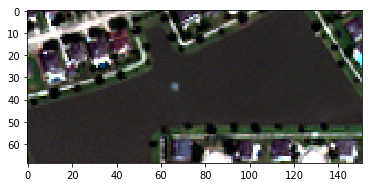

(2045501,)
(8, 2045501)
-----------------------------------------

is multipolygon object: 39

-----------------------------------------

is multipolygon object: 40

-----------------------------------------

is multipolygon object: 41

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-168738334 is good object: 42
2017-09-10T17:12:14.979Z
10300100706B3100
Water
Fetching Image... 1 tile


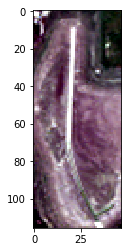

(2050953,)
(8, 2050953)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-317969956 is good object: 43
2017-09-10T17:12:14.979Z
10300100706B3100
Water
Fetching Image... 1 tile


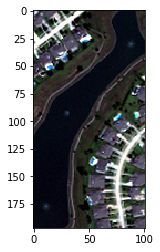

(2070850,)
(8, 2070850)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-45181596 is good object: 44
2017-09-09T17:20:58.791Z
10400100324CA000
Water
Fetching Image... 1 tile


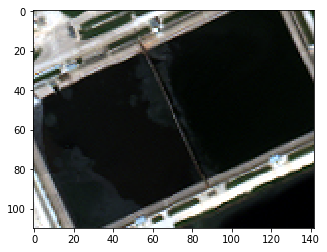

(2086470,)
(8, 2086470)
-----------------------------------------

Fetching Image... 2 tiles
image for OSM-way-431592486 is good object: 45
2016-11-15T17:22:13.161Z
1040010024A09900
Water
Fetching Image... 2 tiles


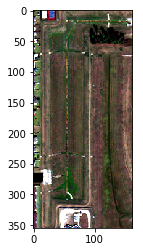

(2143980,)
(8, 2143980)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-225640149 is good object: 46
2017-09-10T17:12:14.979Z
10300100706B3100
Water
Fetching Image... 1 tile


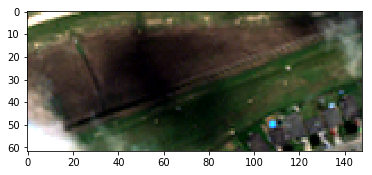

(2153156,)
(8, 2153156)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-207063814 is good object: 47
2017-09-10T17:12:14.979Z
10300100706B3100
Water
Fetching Image... 1 tile


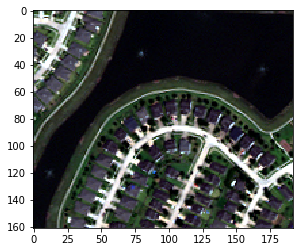

(2184068,)
(8, 2184068)
-----------------------------------------

is multipolygon object: 48

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-219137108 is good object: 49
2017-09-07T17:21:01.703Z
10300100710B8200
Water
Fetching Image... 1 tile


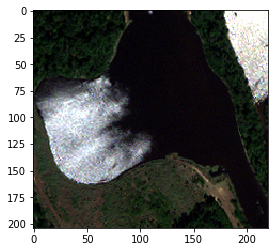

(2228948,)
(8, 2228948)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-169850140 is good object: 50
2017-09-07T17:21:39.008Z
103001007176CB00
Water
Fetching Image... 1 tile


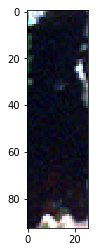

(2231366,)
(8, 2231366)
-----------------------------------------

is multipolygon object: 51

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-289067526 is good object: 52
2017-09-07T17:21:01.703Z
10300100710B8200
Water
Fetching Image... 1 tile


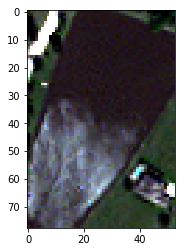

(2235500,)
(8, 2235500)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-142865402 is good object: 53
2017-09-09T17:21:18.067Z
1040010031D1EC00
Water
Fetching Image... 1 tile


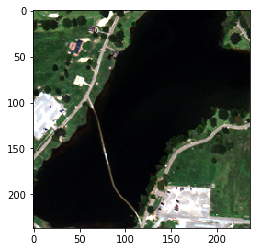

(2291432,)
(8, 2291432)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-41291246 is good object: 54
2017-09-09T17:21:18.067Z
1040010031D1EC00
Water
Fetching Image... 1 tile


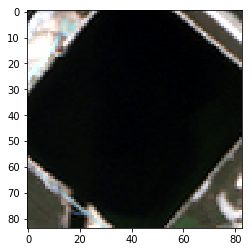

(2298404,)
(8, 2298404)
-----------------------------------------

Fetching Image... 4 tiles
image for OSM-way-225342053 is good object: 55
2017-09-07T17:22:12.893Z
103001006E919400
Water
Fetching Image... 4 tiles


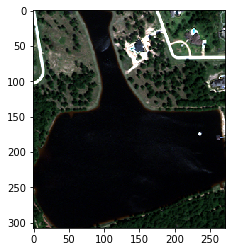

(2382180,)
(8, 2382180)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-170678074 is good object: 56
2017-09-07T17:21:39.008Z
103001007176CB00
Water
Fetching Image... 1 tile


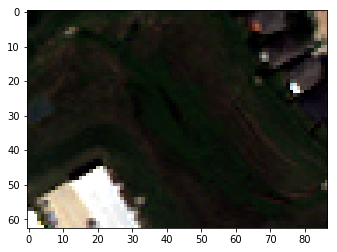

(2387661,)
(8, 2387661)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-147359933 is good object: 57
2017-09-10T17:12:35.669Z
103001007153DE00
Building
Fetching Image... 1 tile


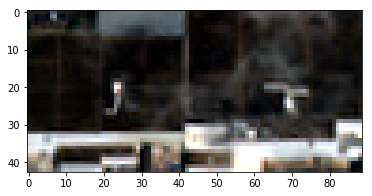

(2391488,)
(8, 2391488)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-317324736 is good object: 58
2017-09-10T17:12:35.669Z
103001007153DE00
Building
Fetching Image... 1 tile


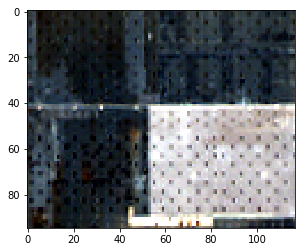

(2402603,)
(8, 2402603)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-342660175 is good object: 59
2017-09-10T17:11:26.528Z
1030010070B54F00
Building
Fetching Image... 1 tile


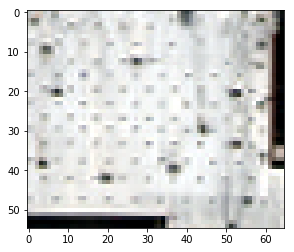

(2406178,)
(8, 2406178)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-186813445 is good object: 60
2017-09-10T17:11:26.528Z
1030010070B54F00
Building
Fetching Image... 1 tile


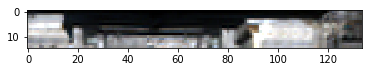

(2408188,)
(8, 2408188)
-----------------------------------------

is multipolygon object: 61

-----------------------------------------

is multipolygon object: 62

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-439250263 is good object: 63
2017-09-10T17:11:26.528Z
1030010070B54F00
Building
Fetching Image... 1 tile


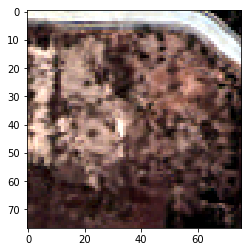

(2414040,)
(8, 2414040)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-220790153 is good object: 64
2017-10-23T17:29:18.194Z
103001007174DA00
Building
Fetching Image... 1 tile


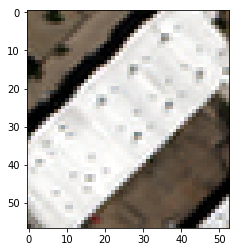

(2417061,)
(8, 2417061)
-----------------------------------------

is multipolygon object: 65

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-41366578 is good object: 66
2017-09-07T17:21:48.364Z
10300100704B5000
Building
Fetching Image... 1 tile


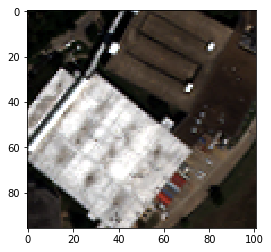

(2426757,)
(8, 2426757)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-53845094 is good object: 67
2017-09-09T17:21:18.067Z
1040010031D1EC00
Building
Fetching Image... 1 tile


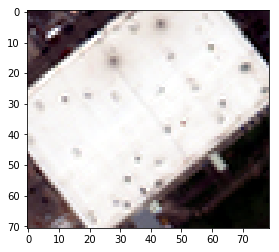

(2432366,)
(8, 2432366)
-----------------------------------------

is multipolygon object: 68

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-231775523 is good object: 69
2017-09-10T17:11:26.528Z
1030010070B54F00
Building
Fetching Image... 1 tile


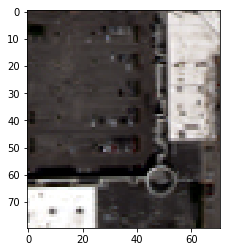

(2438046,)
(8, 2438046)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-47635314 is good object: 70
2017-09-10T17:12:35.669Z
103001007153DE00
Building
Fetching Image... 1 tile


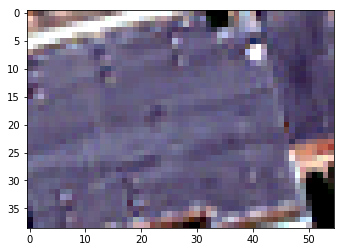

(2440191,)
(8, 2440191)
-----------------------------------------

is multipolygon object: 71

-----------------------------------------

is multipolygon object: 72

-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-318006946 is good object: 73
2017-09-10T17:12:35.669Z
103001007153DE00
Building
Fetching Image... 1 tile


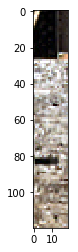

(2442471,)
(8, 2442471)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-431602453 is good object: 74
2017-09-07T17:21:13.367Z
103001006E9B2C00
Building
Fetching Image... 1 tile


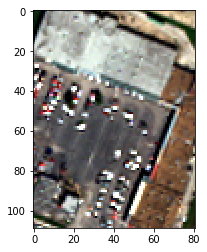

(2451300,)
(8, 2451300)
-----------------------------------------

Fetching Image... 1 tile
image for OSM-way-221018262 is good object: 75
2017-10-23T17:29:18.194Z
103001007174DA00
Building
Fetching Image... 1 tile


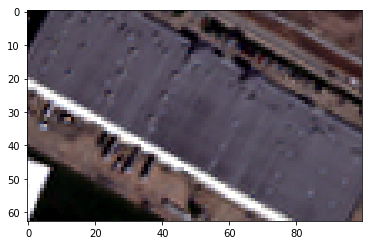

(2457600,)
(8, 2457600)


In [17]:

################ this takes a long time


from PIL import Image, ImageDraw
import copy
import numpy as np

# load multipolygon type from pickle for check
multipolygon_type = pickle.load( open( "Pickle/multipolygon_type.p", "rb" ) )
        
for objects in selection_all.index:
    
    print '-----------------------------------------\n'
    ### setting a buffer can remove the polygon or make it into a multipolygon, both are unusable so check if this is the case
    park_utm = transform(project_utm, geom_list_selection_all[objects])  # apply projection
    
    
    # perform check # get x y coordinates of polygon and set a buffer if polygon is large enough
    if (type(park_utm.buffer(buffer_size)) == multipolygon_type) | (park_utm.buffer(buffer_size).area == 0):
        
        message = "is multipolygon"
        
        
        print message + ' object: ' + str(objects) +'\n'
    
    else: 
        
        x,y = park_utm.buffer(buffer_size).exterior.xy

        park_buffer_wgs = transform(project_wgs,park_utm.buffer(buffer_size))  # apply projection  


        # get wgs projected x,y coordinates and create bounding box for image aquisition
        x_wgs,y_wgs = park_buffer_wgs.exterior.xy
        
        bbox_park_area_float = min(x_wgs), min(y_wgs), max(x_wgs), max(y_wgs)

        bbox_park_area = str([min(x_wgs), min(y_wgs), max(x_wgs), max(y_wgs)])

        bbox_park_area_str = nf.listToStringWithoutBrackets(bbox_park_area)
        

        # convert bounding box to well known format usable by GBDX tools
        bbox_wkt = box(*bbox_park_area_float).wkt

        multipolygon_type = pickle.load( open( "Pickle/multipolygon_type.p", "rb" ) )


        selection_images = nf.image_query_check(bbox_wkt,park_utm,buffer_size,multipolygon_type,project_wgs,x_wgs,y_wgs)

        if not selection_images.empty:
            # set park bounding box 
            bbox = env.inputs.get('bbox', bbox_park_area_str)

            # set catalog id from selection
            catalog_id = env.inputs.get('catalog_id', selection_images.id[0])

            # collect image
            image = CatalogImage(catalog_id, band_type="MS", bbox=map(float, bbox.split(",")),proj=UTM_EPSG_code,pansharpen=False)


            #create array from GBDX image
            image_array = image[:,:,:].read()

            # get second band to see if image is defective (some images show only black)
            # use image if not defective, otherwise 
            if (image_array.size == 0):
                
                print('no image')
            
            elif (image_array[1,:,:].min() != 0) :
                
                
                print 'image for ' + selection_all.OSM_id[objects] + ' is good object: ' + str(objects )
                print image.ipe_metadata["image"]["acquisitionDate"]
                print image.cat_id
                print selection_all.item_type[objects]


                # resize polygon and plot polygon over image
                # subtract minimal values from utm polygon x and y to set 0,0 point as start 
                x1 = np.subtract(x, min(x))
                y1 = np.subtract(y, min(y))

                # devide the x and y coordinate of the polygon by the size of the image to match both sizes 
                x2 = np.divide(x1,max(x1)/image.shape[2])
                y2 = np.divide(y1,max(y1)/image.shape[1])


                n_bands, rows, cols  = image.shape

                # calculate total cells for each class by masking and setting pixel values to 1

                # create sequence of edited x and y coordinates, widht and heigth  for use in ImageDraw function
                polygon = [(x2[i], y2[i]) for i in range(len(x2))]
                width = image.shape[2]
                height = image.shape[1]
                                                                   
                # convert polygon coordinates to raster/array values using ImageDraw
                img = Image.new('L', (width, height), 0)
                ImageDraw.Draw(img).polygon(polygon, fill=dict_type[selection_all.item_type[objects]])
                # convert image to array and set as mask
                mask = np.array(img)


                # flip the array for matching with the mask array
                image_array_flipped = np.fliplr(image_array[:,:,:])
                reshaped_data = image_array_flipped.reshape(8,(rows*cols))
                reshaped_label = mask.reshape(1,(rows*cols))
                
                if data_all.size == 0:
                    
                    data_all = reshaped_data     
                else: 
                    
                    data_all = np.concatenate((data_all,reshaped_data), axis = 1)
                
                label_all = np.append(label_all,reshaped_label)
                
                plt.imshow(image.rgb())
                plt.show()
                
                print label_all.shape
                print data_all.shape
             
                
            else:
                
                print 'image defective' 
                # move to next without doing analysis

        else:

            print 'no image' 
            # move to next without doing analysis
            
            
            
################ this takes a long time


In [16]:
image_array.size == 0

True

In [18]:
### Remove pixels without class

label_all_no0 = label_all[label_all != 0]
data_all_no0 = data_all[:,label_all != 0]


print label_all.shape
print data_all.shape

print label_all_no0.shape
print data_all_no0.shape

(2457600,)
(8, 2457600)
(1054320,)
(8, 1054320)


In [19]:
with open('Pickle/label_all_{}.pickle'.format(city), 'wb') as handle:
    pickle.dump(label_all_no0, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
    
with open('Pickle/data_all_{}.pickle'.format(city), 'wb') as handle:
    pickle.dump(data_all_no0, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Test and visualization scripts

In [41]:
with open('Pickle/data_all_{}.pickle'.format(city), 'rb') as handle:
    data_all = pickle.load(handle)
    
    
with open('Pickle/label_all_{}.pickle'.format(city), 'rb') as handle:
    label_all = pickle.load(handle)

TypeError: only integer scalar arrays can be converted to a scalar index

In [12]:
from random import randint


image.cat_id

u'103001006FD63D00'

In [806]:
print reshaped_data.shape
print reshaped_label.shape

if reshaped_data.shape[1] != reshaped_label.shape[1]:
    print 'not the same size'
else: 
    print 'same size'





backshaped = reshaped_data.reshape(8,rows,cols)

(8, 123900)
(1, 123900)
same size


Area of the park is 17.0ha
Band Names: 8-band (Coastal, Blue, Green, Yellow, Red, Red-edge, NIR1, NIR2) Multispectral


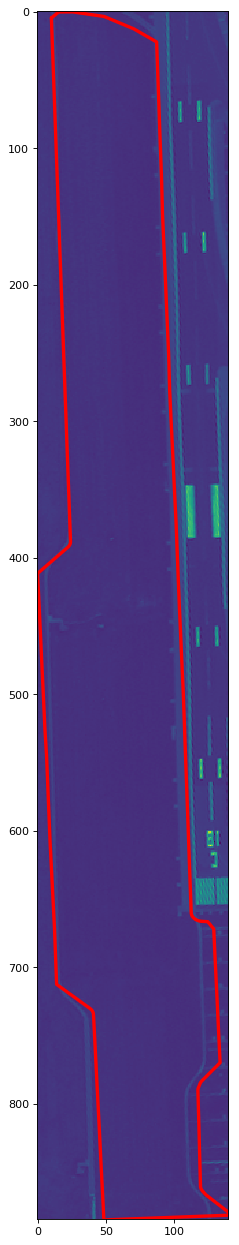

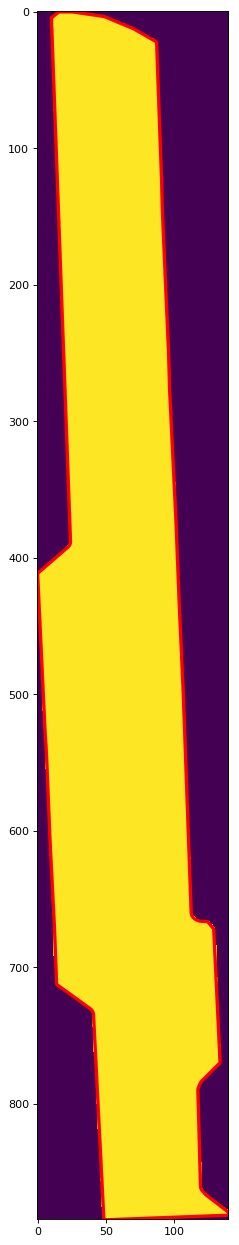

In [807]:
### plot results


# plot image and polygon in one figure
ax = plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x2, y2, color='#FF0000', alpha=1,
    linewidth=3, solid_capstyle='round', zorder=2)
plt.imshow(backshaped[1,:,:])



print('Area of the park is {:0.1f}ha'.format(park_utm.area/10000))

# Collect the metadata
metadata = image.ipe.metadata['image']
# What are those bands?
print 'Band Names:', metadata['sensorName']


# plot image and polygon in one figure
ax2 = plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x2, y2, color='#FF0000', alpha=1,
    linewidth=3, solid_capstyle='round', zorder=2)


plt.imshow(mask)

In [762]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(reshaped_data))
StandardScaler(copy=True, with_mean=True, with_std=True)
print(scaler.mean_)
data_scaled = scaler.transform(reshaped_data)

data_scaled = data_scaled


StandardScaler(copy=True, with_mean=True, with_std=True)
[1001.125  991.75   947.875 ...  853.25   771.5   1164.375]


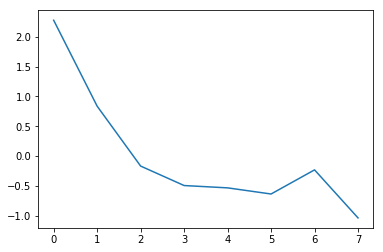

In [609]:
plt.plot(data_scaled[:,2])

In [66]:
# resize polygon and plot polygon over image

import numpy as np

# subtract minimal values from utm polygon x and y to set 0,0 point as start 
x1 = np.subtract(x, min(x))
y1 = np.subtract(y, min(y))

# devide the x and y coordinate of the polygon by the size of the image to match both sizes 
x2 = np.divide(x1,max(x1)/image.shape[2])
y2 = np.divide(y1,max(y1)/image.shape[1])

# plot image and polygon in one figure
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x2, y2, color='#FF0000', alpha=1,
    linewidth=3, solid_capstyle='round', zorder=2)
plt.imshow(np.flipud(image.rgb()))

plt.gca().invert_yaxis()

print('Area of the park is {:0.1f}ha'.format(park_utm.area/10000))

# Collect the metadata
metadata = image.ipe.metadata['image']
# What are those bands?
print 'Band Names:', metadata['sensorName']


TypeError: 'int' object is not iterable

In [300]:
## Convert x2 and y2 back to a polygon 
from shapely import geometry

poly = geometry.Polygon([[x2[i], y2[i]] for i in range(len(x2))])


In [301]:
# scikit-image modules for image science operators
from skimage import filters, morphology

## do pixel based analysis
# Calculate the water index
water_index = (image[7,:,:] - image[0,:,:]) / (image[7,:,:] + image[0,:,:])

# Also extract the visible color (i.e., Red-Green-Blue) bands, which we'll use for side-by-side plotting as we proceed
rgb = image.rgb()

# calculate water index and ndvi
rgb = image.rgb()

coastal = image[0,:,:].astype(np.float32)
red = image[4,:,:].astype(np.float32)
nir = image[6,:,:].astype(np.float32)
blue = image [1,:,:].astype(np.float32)
nir2 = image[7,:,:].astype(np.float32)

water_index = (nir2 - coastal)/(nir2 + coastal)

ndvi = np.clip((nir - red)/(nir + red), -1, 1)

EVI = 2.5 * ( nir - red ) / ( nir + 6.5 * red - 7.5 * blue+ 1.0 )

# set threshold values for water, tree, etc. 
A = ndvi >= 0.6
B = ndvi.all() >= 0.3 and ndvi.all() < 0.6
C = ndvi < 0.3
plants= A*2+B*3+C

# First, clean up any nan values
water_index[np.isnan(water_index)] = 0

# Next, run a gaussian smoothing kernel over the image. This will smooth out localized noise in the water index
# by use a focal moving window.
water_index_smoothed = filters.gaussian(water_index, preserve_range=True)

# Finally, we are going to run the thresholding. We are going to use a method called Otsu's method,
# which picks the threshold that will maximize the variance between the values on either side of it.
# For more info on Otsu's Method, see: 
# http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_thresholding.html
# and http://en.wikipedia.org/wiki/Otsu’s_method.


# Find the threshold
binary_threshold = -0.5 

# Apply the threshold
binary_water = water_index_smoothed >= binary_threshold
# Specify the minimum feature size in square meters, and then use info from the image metadata 
# to translate to grid cell count.

# Set the minimum feature size to 400 sq km (400,000 m)
min_feature_size_m2 = 40.

# From the image metadata, we can determine the area of a single grid cell
cell_height_m = image.ipe.metadata['image']['groundSampleDistanceMeters']
cell_area_m2 = cell_height_m**2

# Finally, use the cell size to convert the minimum feature size to grid cells
min_feature_size_cells = np.round((min_feature_size_m2/cell_area_m2)).astype('int64')

# First, remove the small holes
water_cleaned = morphology.remove_small_holes(binary_water, min_feature_size_cells)

# Then remove the small objects
water_cleaned = morphology.remove_small_objects(water_cleaned, min_feature_size_cells, connectivity=2)

# Combine all layers for easier analysis
all_layers = plants+water_cleaned*3

Fetching Image... 16 tiles
Fetching Image... 16 tiles


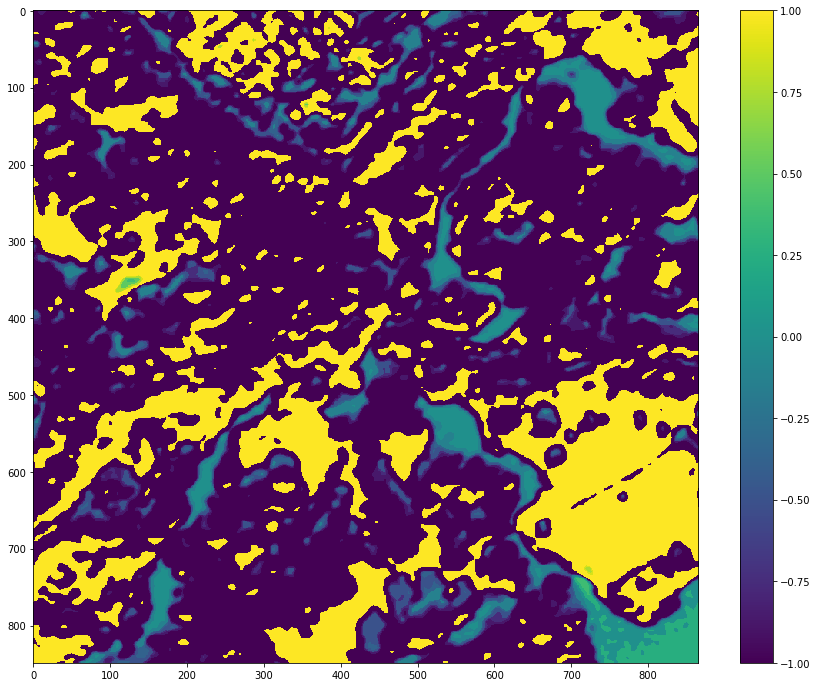

In [302]:
# plot one of the calculated rasters

def plot(image, w=15, h=12, cmap='jet'):
    f, ax = plt.subplots(1, figsize=(w,h))
    ax.axis('on')
    plt.imshow(image, cmap=cmap)
    plt.colorbar()
    plt.show()
    

plt.subplots(1,figsize=(15,12))
plt.imshow(EVI, vmin=-1, vmax=1,) # edit this to plot another raster
plt.colorbar()


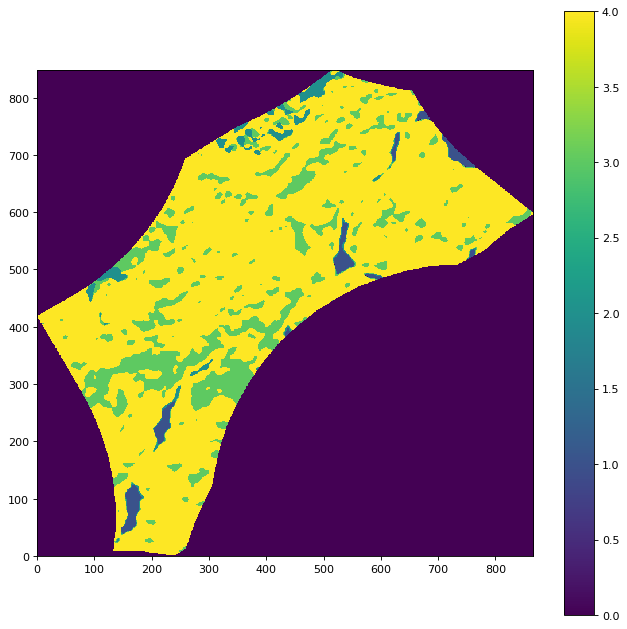

In [303]:
from PIL import Image, ImageDraw
import copy

# calculate total cells for each class by masking and setting pixel values to 1

# create sequence of edited x and y coordinates, widht and heigth  for use in ImageDraw function
polygon = [(x2[i], y2[i]) for i in range(len(x2))]
width = all_layers.shape[1]
height = all_layers.shape[0]


# convert polygon coordinates to raster/array values using ImageDraw
img = Image.new('L', (width, height), 0)
ImageDraw.Draw(img).polygon(polygon, fill=1)
# convert image to array and set as mask
mask = np.array(img)

# create boolean mask
mask = mask == 1

# copy layers for classification
EVI_test = copy.copy(EVI)
test_image = copy.copy(all_layers)

# flip image and EVI to allign with polygon based mask
EVI_test = np.flipud(EVI_test)
test_image = np.flipud(test_image)


# apply mask to test image 
test_image[mask == 0] = 0

# copy layers for total pixel count 
test_image_buildup = copy.copy(test_image)
test_image_water = copy.copy(test_image)
test_image_Green = copy.copy(test_image)
total_pixels = copy.copy(test_image)


# remove all pixel values that do not belong to class and set all other pixel values to 1
test_image_buildup[test_image_buildup != 4] = 0
test_image_water[test_image_water != 1] = 0



test_image_buildup[test_image_buildup == 4] = 1
test_image_water[test_image_water == 1] = 1

test_image_Green[test_image_Green == 3] = 5
test_image_Green[ test_image_Green != 5] = 0

test_image_Green[test_image_Green == 5] = 1

test_image_Trees = copy.copy(test_image_Green)
test_image_Grass = copy.copy(test_image_Green)

test_image_Trees[EVI_test > -.25] = 0
test_image_Grass[EVI_test < -.25] = 0

total_pixels[total_pixels > 0] = 1

# create final classification i
final_classification = test_image_water+(2*test_image_buildup)+(3*test_image_Grass)+(4*test_image_Trees)

plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(final_classification, vmin=0, vmax=4)
# plt.imshow(test_image_Trees, vmin=-1, vmax=1)
plt.colorbar()
plt.gca().invert_yaxis()




In [304]:
# calculate percentage of pixels covered per class

percentage_trees  = round((float(sum(sum(test_image_Trees)))/float(sum(sum(total_pixels))))*100,1)
percentage_buildup  = round(float(sum(sum(test_image_buildup)))/float(sum(sum(total_pixels)))*100,1)
percentage_water  = round(float(sum(sum(test_image_water)))/float(sum(sum(total_pixels)))*100,1)
percentage_grass  = round(float(sum(sum(test_image_Grass)))/float(sum(sum(total_pixels)))*100,1)


# print results
print 'Total pixels            ', sum(sum(total_pixels))
print 'Total tree pixels       ', sum(sum(test_image_Trees)),' which is ', percentage_trees, '%'
print 'Total grass pixels      ', sum(sum(test_image_Grass)),' which is ', percentage_grass, '%'
print 'Total impervious pixels ', sum(sum(test_image_buildup)),' which is  ', percentage_buildup, '%'
print 'Total water pixels      ', sum(sum(test_image_water)),' which is  ', percentage_water, '%'

print percentage_trees + percentage_buildup + percentage_water + percentage_grass

Total pixels             297369
Total tree pixels        239359  which is  80.5 %
Total grass pixels       46134  which is  15.5 %
Total impervious pixels  6337  which is   2.1 %
Total water pixels       5539  which is   1.9 %
100.0


In [177]:
# Take a look at: !!
# https://gis.stackexchange.com/questions/260304/extract-raster-values-within-shapefile-with-pygeoprocessing-or-gdal
# https://pcjericks.github.io/py-gdalogr-cookbook/raster_layers.html
# https://mapbox.github.io/rasterio/topics/masking-by-shapefile.html

In [96]:
reload(ct)

<module 'classification_tools' from 'classification_tools.pyc'>

In [ ]:
import classification_tools as ct
import gdal
import matplotlib.pyplot as plt
import numpy as np


raster_data_path = "raster_files/sloterpark.tif"
output_fname = "classification.tiff"
train_data_path = "shapefiles"
validation_data_path = "data/train/"

raster_dataset = gdal.Open(raster_data_path, gdal.GA_ReadOnly)
geo_transform = raster_dataset.GetGeoTransform()
proj = raster_dataset.GetProjectionRef()
bands_data = []
for b in range(1, raster_dataset.RasterCount+1):
    band = raster_dataset.GetRasterBand(b)
    bands_data.append(band.ReadAsArray())

bands_data = np.dstack(bands_data)
rows, cols, n_bands = bands_data.shape

bands_data.shape


rows*cols*n_bands

reshaped_data = bands_data.reshape(((rows*cols*n_bands)/n_bands),1,n_bands)

In [5]:
import os


files = [f for f in os.listdir(train_data_path) if f.endswith('.shp')]
classes = [f.split('.')[0] for f in files]
shapefiles = [os.path.join(train_data_path, f)
              for f in files if f.endswith('.shp')]

shapefiles

['shapefiles/my_shp2.shp']

In [6]:
import os


files = [f for f in os.listdir(train_data_path) if f.endswith('.shp')]
classes = [f.split('.')[0] for f in files]
shapefiles = [os.path.join(train_data_path, f)
              for f in files if f.endswith('.shp')]

labeled_pixels = ct.vectors_to_raster(shapefiles, rows, cols, geo_transform,
                                   proj)
is_train = np.nonzero(labeled_pixels)
training_labels = labeled_pixels[is_train]
training_samples = bands_data[is_train]

array([], dtype=float64)

In [ ]:
### get metadata

print("CatID: {} instantiated as a {} {}-band raster with {} rows and {} columns".format(catalog_id, image.dtype, *image.shape))
print("  with geographic bounds: ({})".format(bbox))
print("  in projection: {}".format(image.ipe_metadata["georef"]["spatialReferenceSystemCode"]))
print("  at {:0.2f} meter resolution".format(image.ipe_metadata["image"]["groundSampleDistanceMeters"]))
print("  and {:0.2f} degrees off nadir".format(image.ipe_metadata["image"]["offNadirAngle"]))
print("  taken on {}".format(image.ipe_metadata["image"]["acquisitionDate"]))

print '  shape', image.shape
print image.ipe.metadata['image']['sensorName']